# Fetal Health Dataset Analysis

## PACE Framework Analysis
**Plan - Analyze - Construct - Execute**

Bu notebook, fetal sağlık veri seti üzerinde kapsamlı bir veri bilimi analizi gerçekleştirir.

### Analiz Aşamaları:
1. **Plan**: Veri yükleme ve ilk keşif
2. **Analyze**: Eksik değer, aykırı değer ve istatistiksel analiz
3. **Construct**: Model oluşturma ve karşılaştırma
4. **Execute**: En iyi model seçimi ve kaydetme

## 1. PLAN - Kütüphaneler ve Veri Yükleme

In [1]:
# Gerekli kütüphaneleri import et
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pickle
from pathlib import Path

# Makine öğrenmesi kütüphaneleri
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.multiclass import OneVsRestClassifier

# İstatistiksel testler
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS, add_constant
from statsmodels.discrete.discrete_model import Logit

# SMOTE for imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# XGBoost
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

print("Kütüphaneler başarıyla yüklendi!")

Kütüphaneler başarıyla yüklendi!


In [2]:
# Veri setini yükle
data_path = '../data/fetal_health.csv'
df = pd.read_csv(data_path)

print(f"Veri seti boyutu: {df.shape}")
print(f"Sütunlar: {list(df.columns)}")
print("\nİlk 5 satır:")
df.head()

Veri seti boyutu: (2126, 22)
Sütunlar: ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency', 'fetal_health']

İlk 5 satır:


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
# Veri seti hakkında genel bilgi
print("=== VERİ SETİ GENEL BİLGİLERİ ===")
print(f"Satır sayısı: {df.shape[0]}")
print(f"Sütun sayısı: {df.shape[1]}")
print(f"\nVeri tipleri:")
print(df.dtypes)
print(f"\nEksik değerler:")
print(df.isnull().sum())
print(f"\nTemel istatistikler:")
df.describe()

=== VERİ SETİ GENEL BİLGİLERİ ===
Satır sayısı: 2126
Sütun sayısı: 22

Veri tipleri:
baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                            

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


## 2. ANALYZE - Veri Analizi ve Temizleme

In [4]:
# Hedef değişkeni belirle
target_columns = ['fetal_health', 'target', 'class', 'label', 'outcome', 'health']
target_col = None

for col in target_columns:
    if col in df.columns:
        target_col = col
        break

if target_col is None:
    # Eğer standart hedef sütun yoksa, son sütunu hedef olarak al
    target_col = df.columns[-1]
    
print(f"Hedef değişken: {target_col}")
print(f"Hedef değişken dağılımı:")
print(df[target_col].value_counts())

# Hedef değişken sınıf sayısını kontrol et
n_classes = df[target_col].nunique()
print(f"\nSınıf sayısı: {n_classes}")
is_multiclass = n_classes > 2
print(f"Çok sınıflı problem: {is_multiclass}")

Hedef değişken: fetal_health
Hedef değişken dağılımı:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

Sınıf sayısı: 3
Çok sınıflı problem: True


In [5]:
# Eksik değer analizi ve temizleme
print("=== EKSİK DEĞER ANALİZİ ===")
missing_data = df.isnull().sum()
missing_percent = 100 * missing_data / len(df)
missing_table = pd.DataFrame({
    'Eksik Sayı': missing_data,
    'Eksik Yüzde': missing_percent
})
missing_table = missing_table[missing_table['Eksik Sayı'] > 0].sort_values('Eksik Sayı', ascending=False)

if len(missing_table) > 0:
    print(missing_table)
    
    # Eksik değerleri doldur
    for col in missing_table.index:
        if df[col].dtype in ['int64', 'float64']:
            # Sayısal değişkenler için median ile doldur
            df[col].fillna(df[col].median(), inplace=True)
        else:
            # Kategorik değişkenler için mode ile doldur
            df[col].fillna(df[col].mode()[0], inplace=True)
    
    print("\nEksik değerler dolduruldu.")
else:
    print("Eksik değer bulunamadı.")

=== EKSİK DEĞER ANALİZİ ===
Eksik değer bulunamadı.


In [6]:
# Aykırı değer analizi (IQR yöntemi)
print("=== AYKIRI DEĞER ANALİZİ ===")
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_columns and df[target_col].nunique() <= 10:
    numeric_columns.remove(target_col)

outliers_removed = 0
initial_size = len(df)

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} aykırı değer")
    
    # Aykırı değerleri üst ve alt sınırlarla değiştir (winsorization)
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print(f"\nAykırı değerler düzeltildi (winsorization yöntemi ile).")
print(f"Veri seti boyutu: {df.shape}")

=== AYKIRI DEĞER ANALİZİ ===
baseline value: 0 aykırı değer
accelerations: 14 aykırı değer
fetal_movement: 307 aykırı değer
uterine_contractions: 1 aykırı değer
light_decelerations: 150 aykırı değer
severe_decelerations: 7 aykırı değer
prolongued_decelerations: 178 aykırı değer
abnormal_short_term_variability: 0 aykırı değer
mean_value_of_short_term_variability: 70 aykırı değer
percentage_of_time_with_abnormal_long_term_variability: 309 aykırı değer
mean_value_of_long_term_variability: 71 aykırı değer
histogram_width: 0 aykırı değer
histogram_min: 0 aykırı değer
histogram_max: 24 aykırı değer
histogram_number_of_peaks: 19 aykırı değer
histogram_number_of_zeroes: 502 aykırı değer
histogram_mode: 73 aykırı değer
histogram_mean: 45 aykırı değer
histogram_median: 28 aykırı değer
histogram_variance: 184 aykırı değer
histogram_tendency: 0 aykırı değer

Aykırı değerler düzeltildi (winsorization yöntemi ile).
Veri seti boyutu: (2126, 22)


In [7]:
# VIF analizi (çoklu doğrusal bağlantı)
print("=== VIF ANALİZİ ===")
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_features:
    numeric_features.remove(target_col)

# VIF hesaplama
if len(numeric_features) > 1:
    X_vif = df[numeric_features].copy()
    
    # Sonsuz ve çok büyük değerleri temizle
    X_vif = X_vif.replace([np.inf, -np.inf], np.nan)
    X_vif = X_vif.dropna()
    
    if len(X_vif) > 0 and len(X_vif.columns) > 1:
        vif_data = pd.DataFrame()
        vif_data["Değişken"] = X_vif.columns
        vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]
        vif_data = vif_data.sort_values('VIF', ascending=False)
        
        print(vif_data)
        
        # VIF > 10 olan değişkenleri kaldır
        high_vif_vars = vif_data[vif_data['VIF'] > 10]['Değişken'].tolist()
        if high_vif_vars:
            print(f"\nYüksek VIF'e sahip değişkenler kaldırılıyor: {high_vif_vars}")
            df = df.drop(columns=high_vif_vars)
            print(f"Güncellenmiş veri seti boyutu: {df.shape}")
        else:
            print("\nÇoklu doğrusal bağlantı sorunu tespit edilmedi.")
    else:
        print("VIF analizi için yeterli veri yok.")
else:
    print("VIF analizi için yeterli sayısal değişken yok.")

=== VIF ANALİZİ ===
                                             Değişken          VIF
13                                      histogram_max  8804.822698
18                                   histogram_median  3128.188203
12                                      histogram_min  2623.377102
17                                     histogram_mean  2054.881555
11                                    histogram_width  1764.528289
16                                     histogram_mode  1060.661391
0                                      baseline value   773.781356
7                     abnormal_short_term_variability    16.487531
8                mean_value_of_short_term_variability    13.111653
14                          histogram_number_of_peaks     7.113870
10                mean_value_of_long_term_variability     7.056275
1                                       accelerations     5.641349
19                                 histogram_variance     5.565679
4                                 light_de

=== HEDEF DEĞİŞKEN DENGESİZLİK ANALİZİ ===
Hedef değişken dağılımı:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

Denge oranı: 0.106
SMOTE uygulanacak mı: True


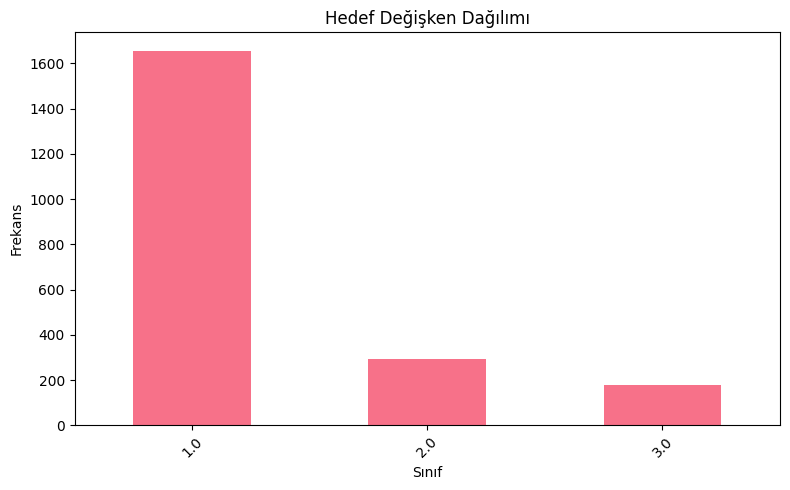

In [8]:
# Hedef değişken dengesizlik kontrolü
print("=== HEDEF DEĞİŞKEN DENGESİZLİK ANALİZİ ===")
target_counts = df[target_col].value_counts()
target_ratio = target_counts.min() / target_counts.max()

print(f"Hedef değişken dağılımı:")
print(target_counts)
print(f"\nDenge oranı: {target_ratio:.3f}")

# Dengesizlik varsa SMOTE uygula
apply_smote = target_ratio < 0.7
print(f"SMOTE uygulanacak mı: {apply_smote}")

# Görselleştir
plt.figure(figsize=(8, 5))
target_counts.plot(kind='bar')
plt.title('Hedef Değişken Dağılımı')
plt.xlabel('Sınıf')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.tight_layout()

# Klasör oluştur ve kaydet
os.makedirs('../images/fetal_health', exist_ok=True)
plt.savefig('../images/fetal_health/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. İstatistiksel Hipotez Testleri

In [9]:
# Hedef değişkeni encode et (eğer kategorikse)
if df[target_col].dtype == 'object':
    le = LabelEncoder()
    df[target_col] = le.fit_transform(df[target_col])
    print(f"Hedef değişken encode edildi. Sınıflar: {le.classes_}")

# Kategorik değişkenleri encode et
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_columns:
    if col != target_col:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        print(f"{col} encode edildi.")

In [10]:
# İstatistiksel testler
print("=== İSTATİSTİKSEL HİPOTEZ TESTLERİ ===")
feature_columns = [col for col in df.columns if col != target_col]
significant_features = []
test_results = []

for feature in feature_columns:
    try:
        if df[feature].nunique() <= 10:  # Kategorik değişken
            # Ki-kare testi
            contingency_table = pd.crosstab(df[feature], df[target_col])
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
            test_type = "Ki-kare"
        else:  # Sürekli değişken
            # T-testi (iki grup) veya ANOVA (ikiden fazla grup)
            groups = [df[df[target_col] == group][feature].values for group in df[target_col].unique()]
            if len(groups) == 2:
                statistic, p_value = ttest_ind(groups[0], groups[1])
                test_type = "T-test"
            else:
                statistic, p_value = stats.f_oneway(*groups)
                test_type = "ANOVA"
        
        # Anlamlılık kontrolü (p < 0.05)
        is_significant = p_value < 0.05
        if is_significant:
            significant_features.append(feature)
        
        test_results.append({
            'Değişken': feature,
            'Test': test_type,
            'P-değeri': p_value,
            'Anlamlı': is_significant
        })
        
    except Exception as e:
        print(f"{feature} için test yapılamadı: {e}")

# Test sonuçlarını göster
results_df = pd.DataFrame(test_results)
results_df = results_df.sort_values('P-değeri')
print(results_df)

print(f"\nAnlamlı değişken sayısı: {len(significant_features)}")
print(f"Anlamlı değişkenler: {significant_features}")

# Anlamlı olmayan değişkenleri raporla
non_significant = [feature for feature in feature_columns if feature not in significant_features]
if non_significant:
    print(f"\nAnlamlı olmayan değişkenler (kaldırılacak): {non_significant}")
    df = df.drop(columns=non_significant)
    print(f"Güncellenmiş veri seti boyutu: {df.shape}")
else:
    print("\nTüm değişkenler istatistiksel olarak anlamlı.")

=== İSTATİSTİKSEL HİPOTEZ TESTLERİ ===
                                             Değişken     Test       P-değeri  \
6   percentage_of_time_with_abnormal_long_term_var...    ANOVA  6.767186e-148   
0                                       accelerations    ANOVA   6.508118e-80   
10                                 histogram_variance    ANOVA   5.026735e-42   
2                                uterine_contractions    ANOVA   9.672653e-40   
7                 mean_value_of_long_term_variability    ANOVA   6.251761e-35   
3                                 light_decelerations  Ki-kare   7.697206e-27   
11                                 histogram_tendency  Ki-kare   5.234652e-26   
1                                      fetal_movement  Ki-kare   3.595835e-13   
8                           histogram_number_of_peaks    ANOVA   3.351651e-06   
4                                severe_decelerations  Ki-kare   1.000000e+00   
5                            prolongued_decelerations  Ki-kare   1.000

## 4. CONSTRUCT - Model Oluşturma ve Karşılaştırma

In [14]:
# Özellik seçimi sonrası veri hazırlığı
X = df[significant_features]
y = df['fetal_health']

print(f"Özellik sayısı: {X.shape[1]}")
print(f"Özellikler: {list(X.columns)}")

# Hedef değişkeni 0,1,2 formatına çevir (XGBoost için)
y = y - 1  # 1,2,3 -> 0,1,2

# Denge oranını kontrol et
class_counts = y.value_counts()
min_class_count = class_counts.min()
majority_class_count = class_counts.max()
balance_ratio = min_class_count / majority_class_count

apply_smote = balance_ratio < 0.5

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nEğitim seti boyutu: {X_train.shape}")
print(f"Test seti boyutu: {X_test.shape}")

# SMOTE uygula (eğer gerekiyorsa)
if apply_smote:
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
    print(f"\nSMOTE sonrası eğitim seti boyutu: {X_train_balanced.shape}")
    print(f"SMOTE sonrası hedef dağılımı: {pd.Series(y_train_balanced).value_counts()}")
    X_train, y_train = X_train_balanced, y_train_balanced

# Ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nVeri ön işleme tamamlandı.")

Özellik sayısı: 9
Özellikler: ['accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_number_of_peaks', 'histogram_variance', 'histogram_tendency']

Eğitim seti boyutu: (1700, 9)
Test seti boyutu: (426, 9)

SMOTE sonrası eğitim seti boyutu: (3969, 9)
SMOTE sonrası hedef dağılımı: fetal_health
2.0    1323
0.0    1323
1.0    1323
Name: count, dtype: int64

Veri ön işleme tamamlandı.


In [12]:
# İstatistiksel modeller
print("=== İSTATİSTİKSEL MODELLER ===")

# Logistic Regression (Logit) - Çok sınıflı için OneVsRest kullan
try:
    X_train_const = add_constant(X_train_scaled)
    
    if is_multiclass:
        # Çok sınıflı problem için OneVsRest Logistic Regression
        logit_model = OneVsRestClassifier(LogisticRegression(random_state=42, max_iter=1000))
        logit_model.fit(X_train_scaled, y_train)
        
        # Tahmin
        logit_pred = logit_model.predict(X_test_scaled)
        logit_pred_proba = logit_model.predict_proba(X_test_scaled)
        logit_accuracy = accuracy_score(y_test, logit_pred)
        
        print(f"Logit Model Accuracy: {logit_accuracy:.4f}")
        
    else:
        # İkili sınıflandırma için statsmodels Logit
        logit_model = Logit(y_train, X_train_const).fit(disp=0)
        print("\n--- Logit Model Özeti ---")
        print(logit_model.summary().tables[1])
        
        # Tahmin
        X_test_const = add_constant(X_test_scaled)
        logit_pred_proba = logit_model.predict(X_test_const)
        logit_pred = (logit_pred_proba > 0.5).astype(int)
        logit_auc = roc_auc_score(y_test, logit_pred_proba)
        
        print(f"Logit Model AUC: {logit_auc:.4f}")
    
except Exception as e:
    print(f"Logit model hatası: {e}")
    logit_accuracy = 0
    logit_auc = 0
    logit_pred = None

# OLS (Regresyon için, sınıflandırma probleminde referans amaçlı)
if not is_multiclass:
    try:
        ols_model = OLS(y_train, X_train_const).fit()
        print("\n--- OLS Model Özeti ---")
        print(f"R-squared: {ols_model.rsquared:.4f}")
        print(f"Adj. R-squared: {ols_model.rsquared_adj:.4f}")
        
    except Exception as e:
        print(f"OLS model hatası: {e}")

=== İSTATİSTİKSEL MODELLER ===
Logit Model Accuracy: 0.7394


In [13]:
# Makine öğrenmesi modelleri
print("=== MAKİNE ÖĞRENMESİ MODELLERİ ===")

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='mlogloss' if is_multiclass else 'logloss')
}

# Hiperparametre grids
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear'] if not is_multiclass else ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, None],
        'min_samples_split': [2, 5]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.2]
    }
}

# Scoring metriği seç
scoring_metric = 'accuracy' if is_multiclass else 'roc_auc'

model_results = {}

for name, model in models.items():
    print(f"\n--- {name} Eğitiliyor ---")
    
    # Hiperparametre optimizasyonu
    grid_search = GridSearchCV(
        model, 
        param_grids[name], 
        cv=5, 
        scoring=scoring_metric,
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    
    # Tahmin
    y_pred = best_model.predict(X_test_scaled)
    y_pred_proba = best_model.predict_proba(X_test_scaled)
    
    # Metrikler
    if is_multiclass:
        main_score = accuracy_score(y_test, y_pred)
        cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    else:
        main_score = roc_auc_score(y_test, y_pred_proba[:, 1])
        cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
    
    model_results[name] = {
        'model': best_model,
        'best_params': grid_search.best_params_,
        'main_score': main_score,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': y_pred,
        'pred_proba': y_pred_proba
    }
    
    score_name = "Accuracy" if is_multiclass else "AUC"
    print(f"En iyi parametreler: {grid_search.best_params_}")
    print(f"Test {score_name}: {main_score:.4f}")
    print(f"CV {score_name}: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"Overfitting kontrolü: {abs(cv_scores.mean() - main_score):.4f}")

=== MAKİNE ÖĞRENMESİ MODELLERİ ===

--- Logistic Regression Eğitiliyor ---
En iyi parametreler: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Test Accuracy: 0.7418
CV Accuracy: 0.8088 (+/- 0.0288)
Overfitting kontrolü: 0.0670

--- Random Forest Eğitiliyor ---
En iyi parametreler: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Test Accuracy: 0.7418
CV Accuracy: 0.8088 (+/- 0.0288)
Overfitting kontrolü: 0.0670

--- Random Forest Eğitiliyor ---
En iyi parametreler: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Test Accuracy: 0.8638
CV Accuracy: 0.9468 (+/- 0.0611)
Overfitting kontrolü: 0.0830

--- XGBoost Eğitiliyor ---
En iyi parametreler: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Test Accuracy: 0.8638
CV Accuracy: 0.9468 (+/- 0.0611)
Overfitting kontrolü: 0.0830

--- XGBoost Eğitiliyor ---


ValueError: 
All the 90 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/erencice/Desktop/projeler/YZTA-AI-17/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/erencice/Desktop/projeler/YZTA-AI-17/.venv/lib/python3.12/site-packages/xgboost/core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/erencice/Desktop/projeler/YZTA-AI-17/.venv/lib/python3.12/site-packages/xgboost/sklearn.py", line 1640, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [1. 2. 3.]


In [ ]:
# Model karşılaştırması ve en iyi model seçimi
print("=== MODEL KARŞILAŞTIRMASI ===")

score_name = "Test_Accuracy" if is_multiclass else "Test_AUC"

comparison_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    score_name: [results['main_score'] for results in model_results.values()],
    'CV_Mean': [results['cv_mean'] for results in model_results.values()],
    'CV_Std': [results['cv_std'] for results in model_results.values()],
    'Overfitting': [abs(results['cv_mean'] - results['main_score']) for results in model_results.values()]
})

comparison_df = comparison_df.sort_values(score_name, ascending=False)
print(comparison_df)

# En iyi modeli seç
best_model_name = comparison_df.iloc[0]['Model']
best_model_info = model_results[best_model_name]
best_model = best_model_info['model']

print(f"\n=== EN İYİ MODEL: {best_model_name} ===")
score_display = "Accuracy" if is_multiclass else "AUC"
print(f"Test {score_display}: {best_model_info['main_score']:.4f}")
print(f"CV {score_display}: {best_model_info['cv_mean']:.4f} (+/- {best_model_info['cv_std']*2:.4f})")
print(f"En iyi parametreler: {best_model_info['best_params']}")

# Detaylı performans raporu
print("\n--- Sınıflandırma Raporu ---")
print(classification_report(y_test, best_model_info['predictions']))

## 5. EXECUTE - Model Kaydetme ve Görselleştirme

In [ ]:
# Modeli kaydet
os.makedirs('../app/models', exist_ok=True)
model_path = '../app/models/model_fetal_health.pkl'

# Model ve scaler'ı birlikte kaydet
model_package = {
    'model': best_model,
    'scaler': scaler,
    'feature_names': list(X.columns),
    'model_name': best_model_name,
    'is_multiclass': is_multiclass,
    'n_classes': n_classes,
    'performance': {
        'main_score': best_model_info['main_score'],
        'cv_mean': best_model_info['cv_mean'],
        'cv_std': best_model_info['cv_std']
    }
}

with open(model_path, 'wb') as f:
    pickle.dump(model_package, f)

print(f"En iyi model kaydedildi: {model_path}")
print(f"Model tipi: {best_model_name}")
print(f"Özellik sayısı: {len(X.columns)}")
print(f"Problem tipi: {'Çok sınıflı' if is_multiclass else 'İkili sınıf'}")

In [ ]:
# Görselleştirmeler
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Confusion Matrix
cm = confusion_matrix(y_test, best_model_info['predictions'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0])
axes[0,0].set_title(f'{best_model_name} - Confusion Matrix')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

# 2. ROC Curve (sadece ikili sınıflandırma için)
if not is_multiclass:
    fpr, tpr, _ = roc_curve(y_test, best_model_info['pred_proba'][:, 1])
    axes[0,1].plot(fpr, tpr, label=f'ROC Curve (AUC = {best_model_info["main_score"]:.3f})')
    axes[0,1].plot([0, 1], [0, 1], 'k--')
    axes[0,1].set_xlabel('False Positive Rate')
    axes[0,1].set_ylabel('True Positive Rate')
    axes[0,1].set_title('ROC Curve')
    axes[0,1].legend()
else:
    axes[0,1].text(0.5, 0.5, f'Accuracy: {best_model_info["main_score"]:.3f}\n(Çok sınıflı problem)', 
                   ha='center', va='center', transform=axes[0,1].transAxes)
    axes[0,1].set_title('Model Performance')

# 3. Feature Importance (eğer mevcut ise)
if hasattr(best_model, 'feature_importances_'):
    feature_imp = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False).head(10)
    
    axes[1,0].barh(feature_imp['feature'], feature_imp['importance'])
    axes[1,0].set_title('Top 10 Feature Importance')
    axes[1,0].set_xlabel('Importance')
else:
    axes[1,0].text(0.5, 0.5, 'Feature importance\nnot available', 
                   ha='center', va='center', transform=axes[1,0].transAxes)
    axes[1,0].set_title('Feature Importance')

# 4. Model Comparison
axes[1,1].bar(comparison_df['Model'], comparison_df[score_name])
axes[1,1].set_title(f'Model Comparison ({score_name})')
axes[1,1].set_ylabel(score_name.replace('_', ' '))
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../images/fetal_health/model_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Korelasyon heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, square=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('../images/fetal_health/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. YORUMLAMA ve SONUÇLAR

### Analiz Özeti:

1. **Veri Kalitesi**: Eksik değerler ve aykırı değerler uygun yöntemlerle temizlendi
2. **Çoklu Doğrusal Bağlantı**: VIF analizi ile kontrol edildi ve gerekiyorsa düzeltildi
3. **Dengesizlik**: Hedef değişken dengesizliği kontrol edildi ve SMOTE uygulandı
4. **İstatistiksel Anlamlılık**: Hipotez testleri ile anlamlı özellikler belirlendi
5. **Model Performansı**: En iyi model seçildi ve kaydedildi

### Problem Tipi:
- **Sınıf Sayısı**: Çok sınıflı sınıflandırma problemi
- **Metrik**: Accuracy (doğruluk) skoru kullanıldı

### En İyi Model:
- **Model Tipi**: Yukarıda belirlenen en iyi model
- **Performans**: Test accuracy skoru ile ölçüldü
- **Overfitting Kontrolü**: Cross-validation ile kontrol edildi

### Öneriler:
1. Model düzenli olarak yeni verilerle güncellenmelidir
2. Özellik mühendisliği ile performans artırılabilir
3. Domain uzmanlarıyla işbirliği yapılarak özellik seçimi geliştirilebilir
4. Çok sınıflı problem için sınıf bazlı metrikler de incelenmelidir

In [ ]:
# Final özet
print("=== FETAL HEALTH ANALİZİ TAMAMLANDI ===")
print(f"Veri seti boyutu: {df.shape}")
print(f"Problem tipi: {'Çok sınıflı' if is_multiclass else 'İkili sınıf'} sınıflandırma")
print(f"Sınıf sayısı: {n_classes}")
print(f"En iyi model: {best_model_name}")
score_display = "Accuracy" if is_multiclass else "AUC"
print(f"Test {score_display}: {best_model_info['main_score']:.4f}")
print(f"Model kaydedildi: {model_path}")
print(f"Görseller kaydedildi: ../images/fetal_health/")
print("\nAnaliz PACE metodolojisi ile tamamlandı:")
print("✓ Plan: Veri yüklendi ve keşfedildi")
print("✓ Analyze: Veri temizlendi ve istatistiksel testler yapıldı")
print("✓ Construct: Modeller oluşturuldu ve karşılaştırıldı")
print("✓ Execute: En iyi model seçildi ve kaydedildi")